# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [4]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    
    np.random.seed(14)

    W1 = np.random.randn(hidden_size, input_size) * 0.1
    b1 = np.zeros((hidden_size, 1))

    W2 = np.random.randn(output_size, hidden_size) * 0.1
    b2 = np.zeros((output_size, 1))

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters



TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [5]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    
    return (x>0).astype(float)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    
    sigmoid = sigmoid(x)
    
    return sigmoid * (1 - sigmoid)

TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [6]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']

    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)              
    Z2 = np.dot(W2, A1) + b2   
    A2 = sigmoid(Z2)          

    # Cache intermediate values for backpropagation
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [7]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    
    # Ensure numerical stability by clipping y_pred
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    return -np.sum(y_true * np.log(y_pred.T)) / y_true.shape[0]


def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - accuracy: Fraction of correct predictions.
    """
    # Compute predictions and accuracy
    predicted_classes = np.argmax(y_pred, axis=0)
    true_classes = np.argmax(y_true, axis=1)
    accuracy = np.mean(predicted_classes == true_classes)
    return accuracy

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [8]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    
    W1, W2 = parameters['W1'], parameters['W2']

    A1, A2 = cache['A1'], cache['A2']
    Z1 = cache['Z1']

    # Number of examples
    num = X.shape[0]

    # Compute gradients for output layer
    dZ2 = A2 - y_true.T
    dW2 = (1 / num) * np.dot(dZ2, A1.T)
    db2 = (1 / num) * np.sum(dZ2, axis=1, keepdims=True)

    # Compute gradients for hidden layer
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1 / num) * np.dot(dZ1, X)
    db1 = (1 / num) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        "W1": dW1,
        "b1": db1,
        "W2": dW2,
        "b2": db2
    }

    return gradients

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [9]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """

    parameters['W1'] -= learning_rate * gradients['W1']
    parameters['b1'] -= learning_rate * gradients['b1']
    parameters['W2'] -= learning_rate * gradients['W2']
    parameters['b2'] -= learning_rate * gradients['b2']
    
    return parameters 

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [10]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    
    X_train = X_train.reshape(X_train.shape[0], -1)
    
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} , Loss: {loss:.4f}")

    return parameters


hidden_sizes = [32, 64, 128]

for size in hidden_sizes:
    print(f"\nTraining with hidden layer size: {size}")
    trained_parameters = train_model(
        x_train, y_train, hidden_size=size, epochs=50, learning_rate=0.01)


Training with hidden layer size: 32
Epoch 10/50 , Loss: 1.1555
Epoch 20/50 , Loss: 1.7249
Epoch 30/50 , Loss: 1.9258
Epoch 40/50 , Loss: 1.9599
Epoch 50/50 , Loss: 1.9383

Training with hidden layer size: 64
Epoch 10/50 , Loss: 1.5206
Epoch 20/50 , Loss: 1.8541
Epoch 30/50 , Loss: 1.9041
Epoch 40/50 , Loss: 1.8691
Epoch 50/50 , Loss: 1.8127

Training with hidden layer size: 128
Epoch 10/50 , Loss: 1.7322
Epoch 20/50 , Loss: 1.8612
Epoch 30/50 , Loss: 1.7879
Epoch 40/50 , Loss: 1.6881
Epoch 50/50 , Loss: 1.5954


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [11]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    
    v = {}
    s = {}
    t = 0

    for key in parameters:
        v[key] = np.zeros_like(parameters[key])
        s[key] = np.zeros_like(parameters[key])

    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    
    t += 1  # Increment time step

    # Update moment estimates and apply bias correction
    for key in parameters:
            
        grad = gradients[key]

        v[key] = beta1 * v[key] + (1 - beta1) * grad
        s[key] = beta2 * s[key] + (1 - beta2) * (grad ** 2)

        # Bias correction for v and s
        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)

        # Update the parameter using the corrected first and second moment estimates
        parameters[key] -= learning_rate * \
                v_corrected / (np.sqrt(s_corrected) + epsilon)

    return parameters, v, s, t

TODO: Implement Adam optimizer into the training loop.

In [12]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """

    X_train = X_train.reshape(X_train.shape[0], -1)

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize Adam variables
    v, s, t = initialize_adam(parameters)

    for epoch in range(epochs):
        
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters using Adam
        parameters, v, s, t = update_parameters_with_adam(
            parameters, gradients, v, s, t, learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} , Loss: {loss:.4f}")

    return parameters


hidden_sizes = [32, 64, 128]

for size in hidden_sizes:
    print(f"\nTraining with hidden layer size: {size}")
    trained_parameters = train_model_with_adam(
        x_train, y_train, hidden_size=size, epochs=50, learning_rate=0.001)


Training with hidden layer size: 32
Epoch 10/50 , Loss: 1.1850
Epoch 20/50 , Loss: 2.0585
Epoch 30/50 , Loss: 2.1213
Epoch 40/50 , Loss: 1.7436
Epoch 50/50 , Loss: 1.4432

Training with hidden layer size: 64
Epoch 10/50 , Loss: 1.8934
Epoch 20/50 , Loss: 2.0812
Epoch 30/50 , Loss: 1.3356
Epoch 40/50 , Loss: 1.0236
Epoch 50/50 , Loss: 1.0034

Training with hidden layer size: 128
Epoch 10/50 , Loss: 2.2119
Epoch 20/50 , Loss: 1.2383
Epoch 30/50 , Loss: 0.9171
Epoch 40/50 , Loss: 0.9430
Epoch 50/50 , Loss: 0.8046


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [13]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    
    s = {}

    for key in parameters:
        if 'W' in key:  # for weights
            s[key] = np.zeros_like(parameters[key])
        elif 'b' in key:  # for biases
            s[key] = np.zeros_like(parameters[key])

    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    
    for key in parameters:
        
        s[key] = beta * s[key] + (1 - beta) * np.square(gradients[key])
        parameters[key] -= learning_rate * \
            gradients[key] / (np.sqrt(s[key]) + epsilon)

    return parameters, s

TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [14]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """

    X_train = X_train.reshape(X_train.shape[0], -1)

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)

    loss_history = []

    for epoch in range(epochs):

        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters using the selected optimizer
        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(
                parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(
                parameters, gradients, s, learning_rate)

        # Print the loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} , Loss: {loss:.4f}")

    return loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with Adam optimizer:
Epoch 10/50 , Loss: 1.8934
Epoch 20/50 , Loss: 2.0812
Epoch 30/50 , Loss: 1.3356
Epoch 40/50 , Loss: 1.0236
Epoch 50/50 , Loss: 1.0034


 Training with RMSprop optimizer:
Epoch 10/50 , Loss: 1.5001
Epoch 20/50 , Loss: 1.1333
Epoch 30/50 , Loss: 0.9774
Epoch 40/50 , Loss: 0.9252
Epoch 50/50 , Loss: 0.8149


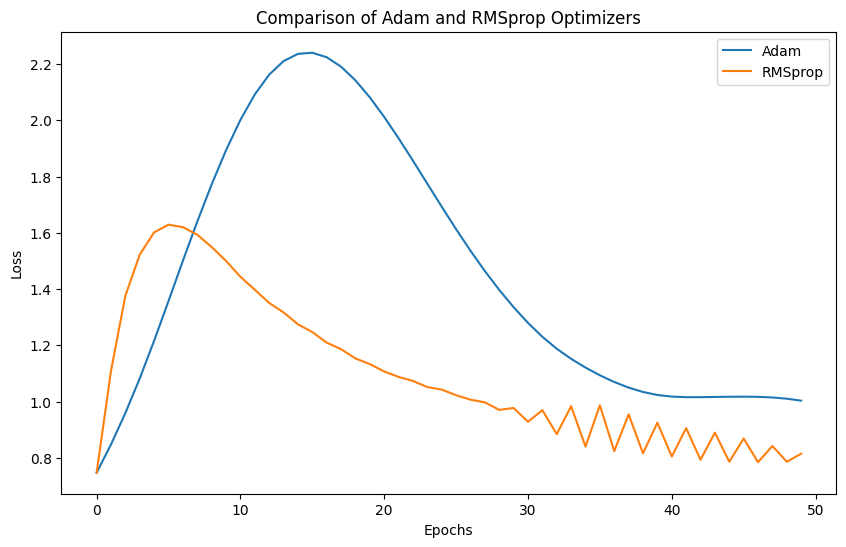

In [15]:

def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print("Training with Adam optimizer:")
    loss_history_adam = train_model(
        X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.001, optimizer='adam')

    print("\n\n Training with RMSprop optimizer:")
    loss_history_rmsprop = train_model(
        X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.001, optimizer='rmsprop')

    plt.figure(figsize=(10, 6))
    plt.plot(loss_history_adam, label='Adam')
    plt.plot(loss_history_rmsprop, label='RMSprop')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Comparison of Adam and RMSprop Optimizers')
    plt.legend()
    plt.show()
    

compare_optimizers(x_train, y_train, hidden_size=64, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [16]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using SGD.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters:
        parameters[key] -= learning_rate * gradients[key]
    return parameters

2. Modify the Training Loop


In [17]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """

    X_train = X_train.reshape(X_train.shape[0], -1)

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    for epoch in range(epochs):
        
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters_with_sgd(
            parameters, gradients, learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} , Loss: {loss:.4f}")

    return loss_history

3. Experiment with Different Learning Rates



Training with learning rate: 0.001
Epoch 10/50 , Loss: 0.8390
Epoch 20/50 , Loss: 0.9363
Epoch 30/50 , Loss: 1.0296
Epoch 40/50 , Loss: 1.1189
Epoch 50/50 , Loss: 1.2038

Training with learning rate: 0.01
Epoch 10/50 , Loss: 1.5206
Epoch 20/50 , Loss: 1.8541
Epoch 30/50 , Loss: 1.9041
Epoch 40/50 , Loss: 1.8691
Epoch 50/50 , Loss: 1.8127

Training with learning rate: 0.1
Epoch 10/50 , Loss: 1.6488
Epoch 20/50 , Loss: 1.2506
Epoch 30/50 , Loss: 1.0617
Epoch 40/50 , Loss: 0.9631
Epoch 50/50 , Loss: 0.8984


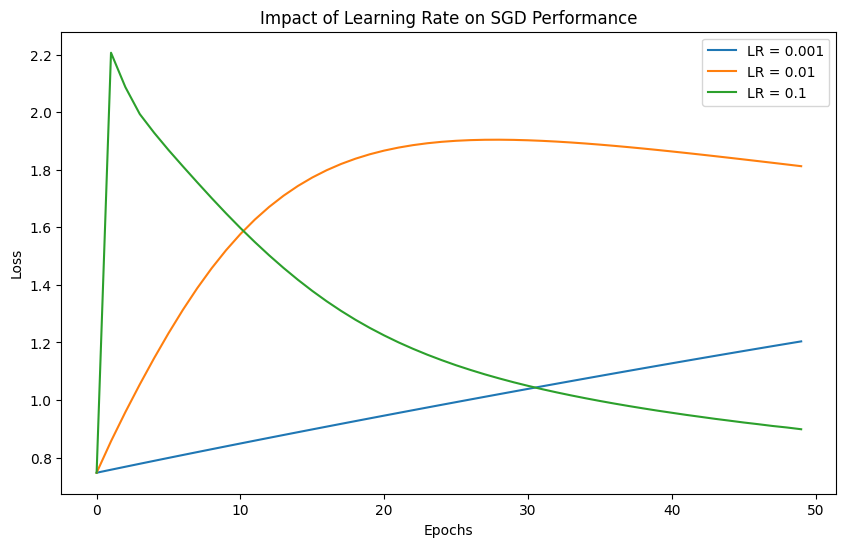

In [18]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """

    loss_histories = {}

    # Train the model with each learning rate
    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        loss_histories[lr] = train_model_with_sgd(
            X_train, y_train, hidden_size, epochs=50, learning_rate=lr)

    # Visualize the results
    plt.figure(figsize=(10, 6))
    for lr, loss_history in loss_histories.items():
        plt.plot(loss_history, label=f'LR = {lr}')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Impact of Learning Rate on SGD Performance')
    plt.legend()
    plt.show()
    

compare_learning_rates(x_train, y_train, hidden_size=64,
                       epochs=50, learning_rates=[0.001, 0.01, 0.1])

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [19]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """

    v = {}

    for key in parameters:
        
        v[key] = np.zeros_like(parameters[key])

    return v




def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    
    for key in parameters:
        
        v[key] = beta * v[key] + (1 - beta) * gradients[key]

        parameters[key] -= learning_rate * v[key]

    return parameters, v

3. Modify the Training Loop


In [20]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    
    X_train = X_train.reshape(X_train.shape[0], -1)

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    
    parameters = initialize_parameters(
        input_size, hidden_size, output_size)

    v = initialize_momentum(parameters)

    loss_history = []

    for epoch in range(epochs):
        
        A2, cache = forward_propagation(X_train, parameters)
        
        loss = compute_loss(y_train, A2)

        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'sgd':
            parameters = update_parameters_with_sgd(
                parameters, gradients, learning_rate)
        elif optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(
                parameters, gradients, v, learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

    return loss_history

4. Train the Model with Both Optimizers


Training with SGD...
Epoch 10, Loss: 1.5206
Epoch 20, Loss: 1.8541
Epoch 30, Loss: 1.9041
Epoch 40, Loss: 1.8691
Epoch 50, Loss: 1.8127


Training with Momentum...
Epoch 10, Loss: 1.1288
Epoch 20, Loss: 1.9300
Epoch 30, Loss: 2.3785
Epoch 40, Loss: 2.2774
Epoch 50, Loss: 2.0051


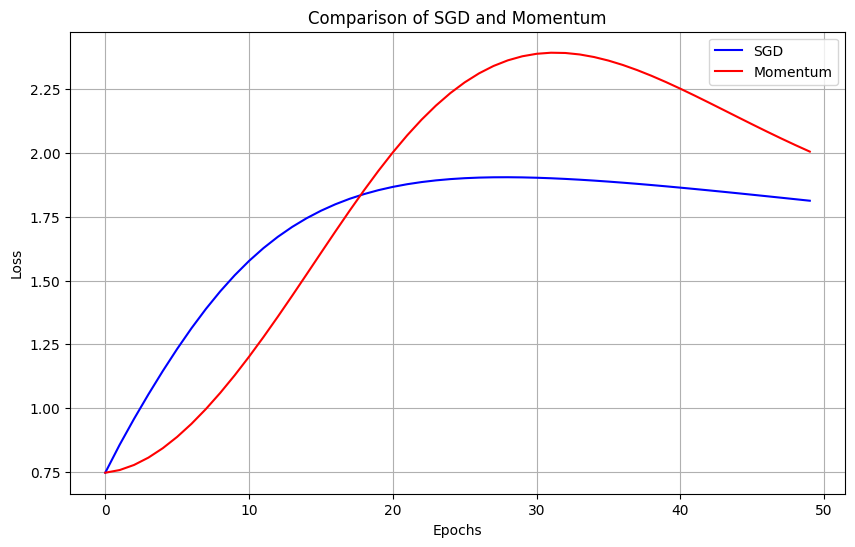

In [21]:

def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """

    # Train with SGD
    print("Training with SGD...")
    loss_history_sgd = train_model(
        X_train, y_train, hidden_size, epochs, learning_rate=0.01, optimizer= 'sgd')

    # Train with Momentum
    print("\n\nTraining with Momentum...")
    loss_history_momentum = train_model(
        X_train, y_train, hidden_size, epochs, learning_rate=0.01, optimizer= 'momentum')

    # Plot the loss curves for both optimizers
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), loss_history_sgd, label='SGD', color='blue')
    plt.plot(range(epochs), loss_history_momentum,
             label='Momentum', color='red')

    plt.title('Comparison of SGD and Momentum')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    

compare_sgd_and_momentum(x_train, y_train, hidden_size=64, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [22]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """

    X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the input data
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    num_samples = X_train.shape[0]

    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0

        num_batches = num_samples // batch_size
        
        for i in range(0, num_samples, batch_size):

            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            A2, cache = forward_propagation(X_batch, parameters)

            # Compute loss
            loss = compute_loss(y_batch, A2)
            epoch_loss += loss

            # Compute accuracy
            accuracy = compute_accuracy(y_batch, A2)
            epoch_accuracy += accuracy

            gradients = backward_propagation(
                X_batch, y_batch, parameters, cache)

            parameters = update_parameters(
                parameters, gradients, learning_rate)

        # Record loss and accuracy for the epoch
        loss_history.append(epoch_loss / num_batches)
        accuracy_history.append(epoch_accuracy / num_batches)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(
                f"Epoch {epoch + 1}/{epochs} , Loss: {epoch_loss / num_batches:.4f} , Accuracy: {epoch_accuracy / num_batches:.4f}")

    return loss_history, accuracy_history

2. Train the Model with Different Mini-Batch Sizes


In [23]:

# Note: This block takes almost 15 minutes to execute :)))
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    
    for batch_size in batch_sizes:
        print(f"\nTraining with mini-batch size: {batch_size}")

        loss_history, accuracy_history = train_model_with_mini_batches(
            X_train, y_train, hidden_size, epochs, learning_rate=0.01, batch_size=batch_size)

        print(f"Final Loss (batch size {batch_size}): {loss_history[-1]:.4f}")
        print(
            f"Final Accuracy (batch size {batch_size}): {accuracy_history[-1]:.4f}")

compare_mini_batch_sizes(x_train, y_train, hidden_size=64,
                         epochs=50, batch_sizes=[16, 32, 64])


Training with mini-batch size: 16
Epoch 10/50 , Loss: 0.3702 , Accuracy: 0.8736
Epoch 20/50 , Loss: 0.3189 , Accuracy: 0.8922
Epoch 30/50 , Loss: 0.2886 , Accuracy: 0.9014
Epoch 40/50 , Loss: 0.2666 , Accuracy: 0.9102
Epoch 50/50 , Loss: 0.2487 , Accuracy: 0.9176
Final Loss (batch size 16): 0.2487
Final Accuracy (batch size 16): 0.9176

Training with mini-batch size: 32
Epoch 10/50 , Loss: 0.4193 , Accuracy: 0.8597
Epoch 20/50 , Loss: 0.3633 , Accuracy: 0.8776
Epoch 30/50 , Loss: 0.3316 , Accuracy: 0.8878
Epoch 40/50 , Loss: 0.3093 , Accuracy: 0.8963
Epoch 50/50 , Loss: 0.2919 , Accuracy: 0.9024
Final Loss (batch size 32): 0.2919
Final Accuracy (batch size 32): 0.9024

Training with mini-batch size: 64
Epoch 10/50 , Loss: 0.4725 , Accuracy: 0.8454
Epoch 20/50 , Loss: 0.4141 , Accuracy: 0.8641
Epoch 30/50 , Loss: 0.3820 , Accuracy: 0.8742
Epoch 40/50 , Loss: 0.3596 , Accuracy: 0.8818
Epoch 50/50 , Loss: 0.3419 , Accuracy: 0.8869
Final Loss (batch size 64): 0.3419
Final Accuracy (batch 

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [24]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    
    X_train = X_train.reshape(X_train.shape[0], -1)
    input_size = X_train.shape[1]  
    output_size = y_train.shape[1] 
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Lists to store loss and accuracy history
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        
        A2,cache = forward_propagation(X_train, parameters)

        # Compute Loss
        loss = compute_loss(y_train, A2)
        # Compute Accuracy
        accuracy = compute_accuracy(y_train, A2)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters(
            parameters, gradients, learning_rate)

        loss_history.append(loss)
        accuracy_history.append(accuracy)

        if (epoch + 1) % 10 == 0:
            print(
                f"Epoch {epoch + 1}/{epochs} , Loss: {loss:.4f} , Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history


Training with Full-Batch Gradient Descent...
Epoch 10/50 , Loss: 1.5206 , Accuracy: 0.1968
Epoch 20/50 , Loss: 1.8541 , Accuracy: 0.2579
Epoch 30/50 , Loss: 1.9041 , Accuracy: 0.3045
Epoch 40/50 , Loss: 1.8691 , Accuracy: 0.3573
Epoch 50/50 , Loss: 1.8127 , Accuracy: 0.4076

Training with Mini-Batch Gradient Descent...
Epoch 10/50 , Loss: 0.4193 , Accuracy: 0.8597
Epoch 20/50 , Loss: 0.3633 , Accuracy: 0.8776
Epoch 30/50 , Loss: 0.3316 , Accuracy: 0.8878
Epoch 40/50 , Loss: 0.3093 , Accuracy: 0.8963
Epoch 50/50 , Loss: 0.2919 , Accuracy: 0.9024


Summary:
Mini-Batch Final Loss: 0.2919, Final Accuracy: 0.9024, Time: 112.65 seconds
Full-Batch Final Loss: 1.8127, Final Accuracy: 0.4076, Time: 27.52 seconds


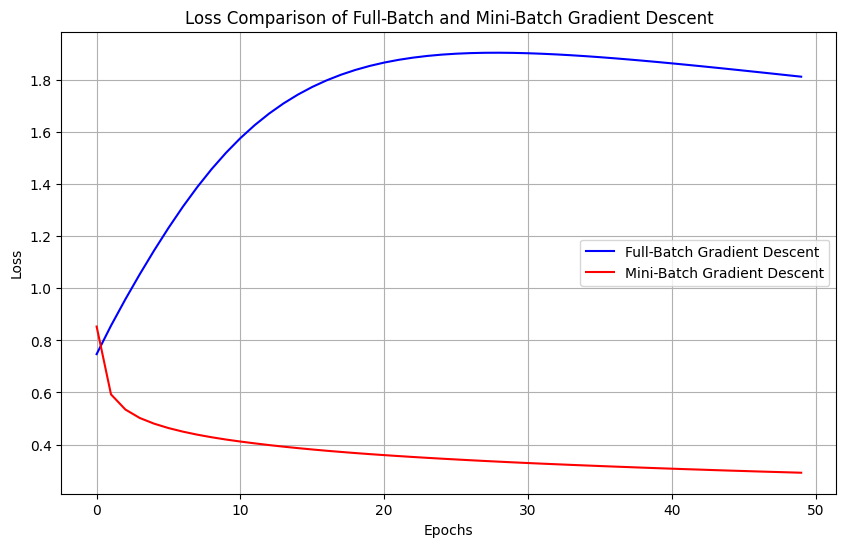

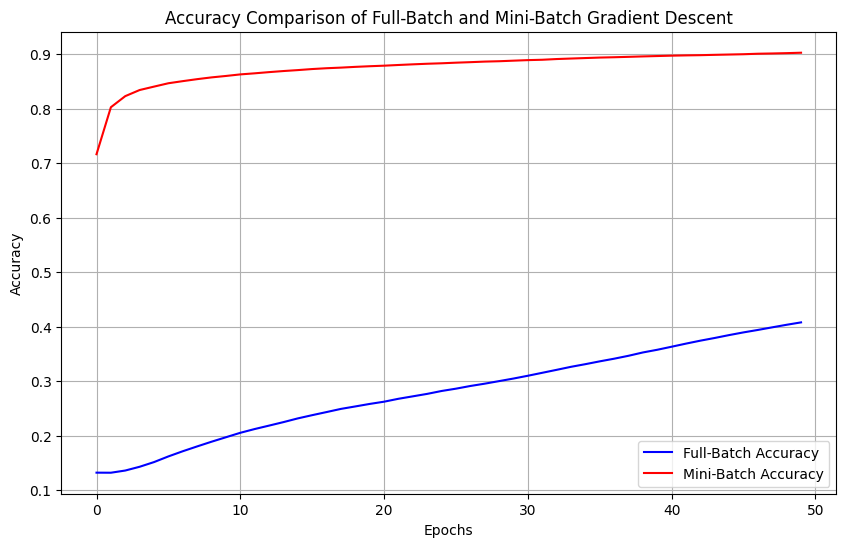

In [25]:
import time
import matplotlib.pyplot as plt


def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """

    # Train with full-batch gradient descent
    print("\nTraining with Full-Batch Gradient Descent...")
    start_time_full_batch = time.time()
    loss_history_full_batch, accuracy_history_full_batch = train_model_full_batch(
        X_train, y_train, hidden_size, epochs, learning_rate=0.01)
    end_time_full_batch = time.time()
    full_batch_time = end_time_full_batch - start_time_full_batch

    # Train with mini-batch gradient descent
    print("\nTraining with Mini-Batch Gradient Descent...")
    start_time_mini_batch = time.time()
    loss_history_mini_batch, accuracy_history_mini_batch = train_model_with_mini_batches(
        X_train, y_train, hidden_size, epochs, learning_rate=0.01, batch_size=batch_size)
    end_time_mini_batch = time.time()
    mini_batch_time = end_time_mini_batch - start_time_mini_batch
    
    # Final Metrics and Summary
    mini_batch_final_loss = loss_history_mini_batch[-1]
    mini_batch_final_accuracy = accuracy_history_mini_batch[-1]
    full_batch_final_loss = loss_history_full_batch[-1]
    full_batch_final_accuracy = accuracy_history_full_batch[-1]

    print("\n\nSummary:")
    print(
        f"Mini-Batch Final Loss: {mini_batch_final_loss:.4f}, Final Accuracy: {mini_batch_final_accuracy:.4f}, Time: {mini_batch_time:.2f} seconds")
    print(
        f"Full-Batch Final Loss: {full_batch_final_loss:.4f}, Final Accuracy: {full_batch_final_accuracy:.4f}, Time: {full_batch_time:.2f} seconds")

    # Plot loss comparison
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), loss_history_full_batch,
             label='Full-Batch Gradient Descent', color='blue')
    plt.plot(range(epochs), loss_history_mini_batch,
             label='Mini-Batch Gradient Descent', color='red')

    plt.title('Loss Comparison of Full-Batch and Mini-Batch Gradient Descent')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot accuracy comparison
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), accuracy_history_full_batch,
             label='Full-Batch Accuracy', color='blue')
    plt.plot(range(epochs), accuracy_history_mini_batch,
             label='Mini-Batch Accuracy', color='red')

    plt.title('Accuracy Comparison of Full-Batch and Mini-Batch Gradient Descent')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


compare_mini_batch_and_full_batch(
    x_train, y_train, hidden_size=64, epochs=50, batch_size=32)